In [26]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns


In [27]:
# Load files
pathX = "./inputs/011.txt"
pathY = "./inputs/007.txt"
x = open(pathX).readlines()[1:][0].replace(" ", "␣")
y = open(pathY).readlines()[1:][0].replace(" ", "␣")

x_len_words = [len(word) for word in x.split("␣")]
y_len_words = [len(word) for word in y.split("␣")]

lx = len(x)
ly = len(y)

lx_len_word = len(x_len_words)
ly_len_word = len(y_len_words)

cx = Counter(x)
cy = Counter(y)


Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť zjistěte absolutní četnosti jednotlivých znaků (symbolů včetně mezery), které se v textech vyskytují. Dále předpokládejme, že první text je vygenerován z homogenního markovského řetězce s diskrétním časem.

In [28]:
print(cx)
print(cy)

Counter({'␣': 1259, 'e': 541, 't': 473, 'o': 440, 'a': 360, 'h': 325, 'n': 315, 'i': 301, 's': 299, 'r': 260, 'd': 241, 'l': 195, 'u': 155, 'm': 151, 'y': 124, 'w': 119, 'f': 101, 'c': 93, 'g': 86, 'p': 81, 'b': 79, 'k': 62, 'v': 42, 'j': 12, 'x': 5, 'q': 3, 'z': 1})
Counter({'␣': 1099, 'e': 585, 't': 457, 'a': 403, 'o': 360, 's': 336, 'n': 334, 'h': 322, 'i': 292, 'r': 287, 'd': 221, 'l': 172, 'f': 137, 'g': 115, 'm': 115, 'u': 114, 'w': 108, 'c': 94, 'b': 65, 'y': 62, 'p': 62, 'k': 39, 'v': 35, 'z': 6, 'x': 6, 'q': 4, 'j': 3})


Text(0.5, 0, 'Symboly')

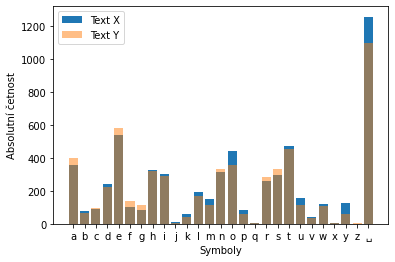

In [29]:
fig, ax = plt.subplots()

xlabels, xvalues = zip(*sorted(cx.items()))
ylabels, yvalues = zip(*sorted(cy.items()))
xindexes = np.arange(len(xlabels))
yindexes = np.arange(len(ylabels))

ax.bar(xlabels, xvalues, label='Text X')
ax.bar(ylabels, yvalues, alpha=0.5, label='Text Y')
ax.legend()
ax.set_ylabel('Absolutní četnost')
ax.set_xlabel('Symboly')

In [30]:
Za předpokladu výše odhadněte matici přechodu markovského řetězce pro první text.
Pro odhad matice přechodu vizte přednášku 17.
Odhadnuté pravděpodobnosti přechodu vhodně graficky znázorněte, např. použitím heatmapy.


SyntaxError: invalid syntax (3280512805.py, line 1)

/tmp/ipykernel_1354/395819935.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  transition_matrix /= transition_matrix.sum(axis=1)[:, np.newaxis]


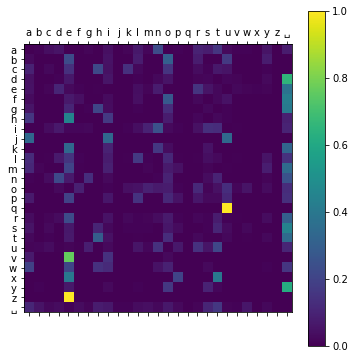

In [ ]:
current_list = list(x)
next = list(x)
next.pop(0)
next.append(None)
bigrams = pd.DataFrame({'current': current_list, 'next': next}).head(-1)

transition_matrix = bigrams.pivot_table(index='current', columns='next', aggfunc='count').fillna(0).astype(int)
transition_matrix /= transition_matrix.sum(axis=1)[:, np.newaxis]


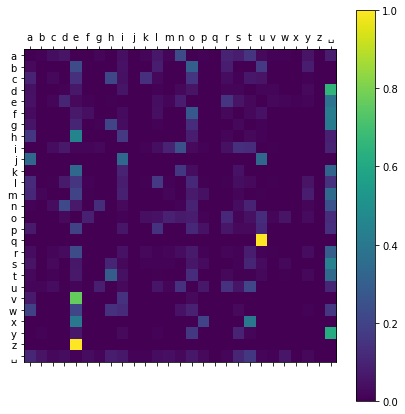

In [34]:
plt.figure(figsize=(7, 7))
plt.matshow(transition_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(transition_matrix.shape[1]), [x[1] for x in transition_matrix.columns])
plt.yticks(range(transition_matrix.shape[0]), transition_matrix.index)
plt.show()


Na základě matice z předchozího bodu najděte stacionární rozdělení π tohoto řetězce pro první text.

In [35]:
eigen_values, eigen_vectors = np.linalg.eig(transition_matrix.T)
v = eigen_vectors[:, np.isclose(eigen_values, 1)]
pi = v.real.T/np.sum(v.real.T, 1)[:, np.newaxis]
print(pi)

In [ ]:
np.equal(pi.T @ A, pi.T).all()